# Homework 14
## Apache Spark
### Ali Asghar Yousuf
### ay06993@st.habib.edu.pk

In [0]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, SparkSession

# sc is the Spark Context already available at databricks, so we do not need to create it again.
# sc = SparkContext()
# sqlContext = SQLContext(sc)

# from pyspark.sql import SparkSession
sqlContext = SparkSession.builder.appName('abc').getOrCreate()

# Creating RDD (Resilient Distributed Dataset) - fundamental data structure of Spark

In [0]:
products = sc.textFile("/FileStore/tables/SalesData_1.txt")

In [0]:
products.first()

'ProductID\tName\tProductNumber\tColor\tStandardCost\tListPrice\tSize\tWeight\tProductCategoryID\tProductModelID\tSellStartDate\tSellEndDate\tDiscontinuedDate\tThumbNailPhoto\tThumbnailPhotoFileName\trowguid\tModifiedDate'

In [0]:
print("The data has {} columns".format(len(products.first().split("\t"))))
header = products.first().split("\t")
header

The data has 17 columns


['ProductID',
 'Name',
 'ProductNumber',
 'Color',
 'StandardCost',
 'ListPrice',
 'Size',
 'Weight',
 'ProductCategoryID',
 'ProductModelID',
 'SellStartDate',
 'SellEndDate',
 'DiscontinuedDate',
 'ThumbNailPhoto',
 'ThumbnailPhotoFileName',
 'rowguid',
 'ModifiedDate']

In [0]:
head = products.first()
content = products.filter(lambda line: line != head)

In [0]:
content.first()

'680\tHL Road Frame - Black, 58\tFR-R92B-58\tBlack\t1059.31\t1431.50\t58\t1016.04\t18\t6\t1998-06-01 00:00:00.000\tNULL\tNULL\t0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000\tno_image_available_small.gif\t43DD68D6-14A4-461F-9069-55309D90EA7E\t2004-03-11 10:01:36.827'

In [0]:
content.map(lambda line: len(line.split("\t"))).distinct().collect()[0]

17

# Example of RDD using Scala

In [0]:
rdd1 = (content.filter(lambda line: line.split("\t"))
 .map(lambda line: (line.split("\t")))
)
rdd1.take(1)

[['680',
  'HL Road Frame - Black, 58',
  'FR-R92B-58',
  'Black',
  '1059.31',
  '1431.50',
  '58',
  '1016.04',
  '18',
  '6',
  '1998-06-01 00:00:00.000',
  'NULL',
  'NULL',
  '0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  'no_image_available_small.gif',
  '43DD68D6-14A4-461F-9069-55309D90EA7E',
  '2004-03-11 10:01:36.827']]

# Converting RDD into Spark Dataframe

In [0]:
df = rdd1.toDF(header)
df.show()

+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|ProductID|                Name|ProductNumber|Color|StandardCost|ListPrice|Size| Weight|ProductCategoryID|ProductModelID|       SellStartDate|         SellEndDate|DiscontinuedDate|      ThumbNailPhoto|ThumbnailPhotoFileName|             rowguid|        ModifiedDate|
+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|      680|HL Road Frame - B...|   FR-R92B-58|Black|     1059.31|  1431.50|  58|1016.04|               18|             6|1998-06-01 00:00:...|                NULL|            NULL|0x474946383961500..

# Using Spark Dataframe syntax and SQL Table syntax

In [0]:
# selecting two columns Name and Weight from original dataframe and convert into their proper datatype. Default is string
df1 = df.select(df.Name, df.Weight.cast("float"))
df1.show(5, truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |NULL   |
|Sport-100 Helmet, Black  |NULL   |
|Mountain Bike Socks, M   |NULL   |
+-------------------------+-------+
only showing top 5 rows



In [0]:
# convert the above Dataframe into SQL Table
df1.createOrReplaceTempView("df_table")
sqlContext.sql(" SELECT * FROM df_table limit 5").show(truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |NULL   |
|Sport-100 Helmet, Black  |NULL   |
|Mountain Bike Socks, M   |NULL   |
+-------------------------+-------+



# Write your solution for Spark Dataframe and Spark SQL. Your output should match with the RDD output

## 1. Find the names and weight of the top 15 products by weight. Sort weight by descending order.

### Using RDD

In [0]:
(content.filter(lambda line: line.split("\t")[7] != "NULL")
 .map(lambda line: (line.split("\t")[1], float(line.split("\t")[7])))
                     .takeOrdered(15, lambda x : -x[1])
                    )

[('Touring-3000 Blue, 62', 13607.7),
 ('Touring-3000 Yellow, 62', 13607.7),
 ('Touring-3000 Blue, 58', 13562.34),
 ('Touring-3000 Yellow, 58', 13512.45),
 ('Touring-3000 Blue, 54', 13462.55),
 ('Touring-3000 Yellow, 54', 13344.62),
 ('Touring-3000 Yellow, 50', 13213.08),
 ('Touring-3000 Blue, 50', 13213.08),
 ('Touring-3000 Yellow, 44', 13049.78),
 ('Touring-3000 Blue, 44', 13049.78),
 ('Mountain-500 Silver, 52', 13008.96),
 ('Mountain-500 Black, 52', 13008.96),
 ('Mountain-500 Silver, 48', 12891.03),
 ('Mountain-500 Black, 48', 12891.03),
 ('Mountain-500 Silver, 44', 12759.49)]

### Using Spark DataFrame

In [0]:
df1 = df.select(df.Name, df.Weight.cast("float"))
df2 = df1.sort(df1.Weight, ascending = False)
df2.show(15)

+--------------------+--------+
|                Name|  Weight|
+--------------------+--------+
|Touring-3000 Blue...| 13607.7|
|Touring-3000 Yell...| 13607.7|
|Touring-3000 Blue...|13562.34|
|Touring-3000 Yell...|13512.45|
|Touring-3000 Blue...|13462.55|
|Touring-3000 Yell...|13344.62|
|Touring-3000 Yell...|13213.08|
|Touring-3000 Blue...|13213.08|
|Touring-3000 Yell...|13049.78|
|Touring-3000 Blue...|13049.78|
|Mountain-500 Silv...|13008.96|
|Mountain-500 Blac...|13008.96|
|Mountain-500 Silv...|12891.03|
|Mountain-500 Blac...|12891.03|
|Mountain-500 Silv...|12759.49|
+--------------------+--------+
only showing top 15 rows



### Using Spark SQL

In [0]:
df1.createOrReplaceTempView("df_table")
sqlContext.sql("SELECT Name, Weight FROM df_table ORDER BY df_table.Weight Desc LIMIT 15").show()

+--------------------+--------+
|                Name|  Weight|
+--------------------+--------+
|Touring-3000 Yell...| 13607.7|
|Touring-3000 Blue...| 13607.7|
|Touring-3000 Blue...|13562.34|
|Touring-3000 Yell...|13512.45|
|Touring-3000 Blue...|13462.55|
|Touring-3000 Yell...|13344.62|
|Touring-3000 Yell...|13213.08|
|Touring-3000 Blue...|13213.08|
|Touring-3000 Yell...|13049.78|
|Touring-3000 Blue...|13049.78|
|Mountain-500 Silv...|13008.96|
|Mountain-500 Blac...|13008.96|
|Mountain-500 Silv...|12891.03|
|Mountain-500 Blac...|12891.03|
|Mountain-500 Silv...|12759.49|
+--------------------+--------+



## 2. Retrieve product details (name, color, size, product model ID) for products where the product model ID is 5

### Using RDD

In [0]:
(content.filter(lambda line:line.split("\t")[9]=="5")
 .map(lambda line: (line.split("\t")[1],line.split("\t")[3], line.split("\t")[6], line.split("\t")[9])).collect()
)

[('HL Mountain Frame - Silver, 42', 'Silver', '42', '5'),
 ('HL Mountain Frame - Silver, 44', 'Silver', '44', '5'),
 ('HL Mountain Frame - Silver, 48', 'Silver', '48', '5'),
 ('HL Mountain Frame - Silver, 46', 'Silver', '46', '5'),
 ('HL Mountain Frame - Black, 42', 'Black', '42', '5'),
 ('HL Mountain Frame - Black, 44', 'Black', '44', '5'),
 ('HL Mountain Frame - Black, 48', 'Black', '48', '5'),
 ('HL Mountain Frame - Black, 46', 'Black', '46', '5'),
 ('HL Mountain Frame - Black, 38', 'Black', '38', '5'),
 ('HL Mountain Frame - Silver, 38', 'Silver', '38', '5')]

### Using Spark Dataframe

In [0]:
df1 = df.select(df.Name, df.Color, df.Size, df.ProductModelID)
df2 = df1.filter(df.ProductModelID ==5)
df2.show()

+--------------------+------+----+--------------+
|                Name| Color|Size|ProductModelID|
+--------------------+------+----+--------------+
|HL Mountain Frame...|Silver|  42|             5|
|HL Mountain Frame...|Silver|  44|             5|
|HL Mountain Frame...|Silver|  48|             5|
|HL Mountain Frame...|Silver|  46|             5|
|HL Mountain Frame...| Black|  42|             5|
|HL Mountain Frame...| Black|  44|             5|
|HL Mountain Frame...| Black|  48|             5|
|HL Mountain Frame...| Black|  46|             5|
|HL Mountain Frame...| Black|  38|             5|
|HL Mountain Frame...|Silver|  38|             5|
+--------------------+------+----+--------------+



### Using Spark SQL

In [0]:
df.createOrReplaceTempView("df_table")
sqlContext.sql("SELECT Name, color,  size, ProductModelID FROM df_table where ProductModelID = 5").show()

+--------------------+------+----+--------------+
|                Name| color|size|ProductModelID|
+--------------------+------+----+--------------+
|HL Mountain Frame...|Silver|  42|             5|
|HL Mountain Frame...|Silver|  44|             5|
|HL Mountain Frame...|Silver|  48|             5|
|HL Mountain Frame...|Silver|  46|             5|
|HL Mountain Frame...| Black|  42|             5|
|HL Mountain Frame...| Black|  44|             5|
|HL Mountain Frame...| Black|  48|             5|
|HL Mountain Frame...| Black|  46|             5|
|HL Mountain Frame...| Black|  38|             5|
|HL Mountain Frame...|Silver|  38|             5|
+--------------------+------+----+--------------+



## 3. Retrieve the name and product number of the products that have a color of 'black', 'red', or 'white' and a size of 'S' or 'M'

### Using RDD

In [0]:
colors = ["White","Black","Red"]
sizes = ["S","M"]

(content.filter(lambda line: line.split("\t")[6] in sizes)
.filter(lambda line: line.split("\t")[3] in colors)
.map(lambda line: (line.split("\t")[1],line.split("\t")[2], line.split("\t")[3],line.split("\t")[6]))
 .collect()
)

[('Mountain Bike Socks, M', 'SO-B909-M', 'White', 'M'),
 ("Men's Sports Shorts, S", 'SH-M897-S', 'Black', 'S'),
 ("Men's Sports Shorts, M", 'SH-M897-M', 'Black', 'M'),
 ("Women's Tights, S", 'TG-W091-S', 'Black', 'S'),
 ("Women's Tights, M", 'TG-W091-M', 'Black', 'M'),
 ('Half-Finger Gloves, S', 'GL-H102-S', 'Black', 'S'),
 ('Half-Finger Gloves, M', 'GL-H102-M', 'Black', 'M'),
 ('Full-Finger Gloves, S', 'GL-F110-S', 'Black', 'S'),
 ('Full-Finger Gloves, M', 'GL-F110-M', 'Black', 'M'),
 ("Women's Mountain Shorts, S", 'SH-W890-S', 'Black', 'S'),
 ("Women's Mountain Shorts, M", 'SH-W890-M', 'Black', 'M'),
 ('Racing Socks, M', 'SO-R809-M', 'White', 'M')]

### Using Spark Dataframe

In [0]:
df1 = df.select(df.Name,df.ProductNumber, df.Color, df.Size,df.ProductModelID)
df2 = df1.filter( ((df.Color=="Black") | (df.Color =="Red") | (df.Color =="White"))& ((df.Size=="S")| (df.Size=="M")) )
df3 = df2.select(df.Name,df.ProductNumber)
df3.show()

+--------------------+-------------+
|                Name|ProductNumber|
+--------------------+-------------+
|Mountain Bike Soc...|    SO-B909-M|
|Men's Sports Shor...|    SH-M897-S|
|Men's Sports Shor...|    SH-M897-M|
|   Women's Tights, S|    TG-W091-S|
|   Women's Tights, M|    TG-W091-M|
|Half-Finger Glove...|    GL-H102-S|
|Half-Finger Glove...|    GL-H102-M|
|Full-Finger Glove...|    GL-F110-S|
|Full-Finger Glove...|    GL-F110-M|
|Women's Mountain ...|    SH-W890-S|
|Women's Mountain ...|    SH-W890-M|
|     Racing Socks, M|    SO-R809-M|
+--------------------+-------------+



### Using Spark SQL

In [0]:
df.createOrReplaceTempView("df_table")
sqlContext.sql("SELECT Name, ProductNumber FROM df_table where (df_table.Color in ('White', 'Red', 'Black')) AND (df_table.Size in ('M', 'S'))").show()

+--------------------+-------------+
|                Name|ProductNumber|
+--------------------+-------------+
|Mountain Bike Soc...|    SO-B909-M|
|Men's Sports Shor...|    SH-M897-S|
|Men's Sports Shor...|    SH-M897-M|
|   Women's Tights, S|    TG-W091-S|
|   Women's Tights, M|    TG-W091-M|
|Half-Finger Glove...|    GL-H102-S|
|Half-Finger Glove...|    GL-H102-M|
|Full-Finger Glove...|    GL-F110-S|
|Full-Finger Glove...|    GL-F110-M|
|Women's Mountain ...|    SH-W890-S|
|Women's Mountain ...|    SH-W890-M|
|     Racing Socks, M|    SO-R809-M|
+--------------------+-------------+



## 4. Retrieve the product name, product number, color and list price of products whose product number begins with 'BK-'. Retrieve only 15 records and Sort the price in descending order

### Using RDD

In [0]:
(content.filter(lambda line: "BK" in line.split("\t")[2])
 .map(lambda line: (line.split("\t")[1], line.split("\t")[2], line.split("\t")[3], float(line.split("\t")[5])))
.takeOrdered(15, lambda x: -x[3]))

[('Road-150 Red, 62', 'BK-R93R-62', 'Red', 3578.27),
 ('Road-150 Red, 44', 'BK-R93R-44', 'Red', 3578.27),
 ('Road-150 Red, 48', 'BK-R93R-48', 'Red', 3578.27),
 ('Road-150 Red, 52', 'BK-R93R-52', 'Red', 3578.27),
 ('Road-150 Red, 56', 'BK-R93R-56', 'Red', 3578.27),
 ('Mountain-100 Silver, 38', 'BK-M82S-38', 'Silver', 3399.99),
 ('Mountain-100 Silver, 42', 'BK-M82S-42', 'Silver', 3399.99),
 ('Mountain-100 Silver, 44', 'BK-M82S-44', 'Silver', 3399.99),
 ('Mountain-100 Silver, 48', 'BK-M82S-48', 'Silver', 3399.99),
 ('Mountain-100 Black, 38', 'BK-M82B-38', 'Black', 3374.99),
 ('Mountain-100 Black, 42', 'BK-M82B-42', 'Black', 3374.99),
 ('Mountain-100 Black, 44', 'BK-M82B-44', 'Black', 3374.99),
 ('Mountain-100 Black, 48', 'BK-M82B-48', 'Black', 3374.99),
 ('Road-250 Red, 44', 'BK-R89R-44', 'Red', 2443.35),
 ('Road-250 Red, 48', 'BK-R89R-48', 'Red', 2443.35)]

### Using Spark Dataframe

In [0]:
df1 = df.select(df.Name,df.ProductNumber, df.Color, df.ListPrice.cast('float'))
df2 = df1.sort(df1.ListPrice, ascending = False)
df3 = df2.filter(df2['ProductNumber'].startswith('BK-'))
df3.show(15)

+--------------------+-------------+------+---------+
|                Name|ProductNumber| Color|ListPrice|
+--------------------+-------------+------+---------+
|    Road-150 Red, 62|   BK-R93R-62|   Red|  3578.27|
|    Road-150 Red, 44|   BK-R93R-44|   Red|  3578.27|
|    Road-150 Red, 48|   BK-R93R-48|   Red|  3578.27|
|    Road-150 Red, 52|   BK-R93R-52|   Red|  3578.27|
|    Road-150 Red, 56|   BK-R93R-56|   Red|  3578.27|
|Mountain-100 Silv...|   BK-M82S-44|Silver|  3399.99|
|Mountain-100 Silv...|   BK-M82S-48|Silver|  3399.99|
|Mountain-100 Silv...|   BK-M82S-38|Silver|  3399.99|
|Mountain-100 Silv...|   BK-M82S-42|Silver|  3399.99|
|Mountain-100 Blac...|   BK-M82B-38| Black|  3374.99|
|Mountain-100 Blac...|   BK-M82B-42| Black|  3374.99|
|Mountain-100 Blac...|   BK-M82B-44| Black|  3374.99|
|Mountain-100 Blac...|   BK-M82B-48| Black|  3374.99|
|    Road-250 Red, 44|   BK-R89R-44|   Red|  2443.35|
|    Road-250 Red, 48|   BK-R89R-48|   Red|  2443.35|
+--------------------+------

### Using Spark SQL

In [0]:
# Retrieve the product name, product number, color and list price of products whose product number begins with 'BK-'. Retrieve only 15 records and Sort the price in descending order
df1.createOrReplaceTempView("df_table")
sqlContext.sql("Select Name, ProductNumber, Color, ListPrice from df_table WHERE ProductNumber LIKE 'BK-%' ORDER BY ListPrice DESC").show(15)

+--------------------+-------------+------+---------+
|                Name|ProductNumber| Color|ListPrice|
+--------------------+-------------+------+---------+
|    Road-150 Red, 62|   BK-R93R-62|   Red|  3578.27|
|    Road-150 Red, 44|   BK-R93R-44|   Red|  3578.27|
|    Road-150 Red, 48|   BK-R93R-48|   Red|  3578.27|
|    Road-150 Red, 52|   BK-R93R-52|   Red|  3578.27|
|    Road-150 Red, 56|   BK-R93R-56|   Red|  3578.27|
|Mountain-100 Silv...|   BK-M82S-44|Silver|  3399.99|
|Mountain-100 Silv...|   BK-M82S-48|Silver|  3399.99|
|Mountain-100 Silv...|   BK-M82S-38|Silver|  3399.99|
|Mountain-100 Silv...|   BK-M82S-42|Silver|  3399.99|
|Mountain-100 Blac...|   BK-M82B-38| Black|  3374.99|
|Mountain-100 Blac...|   BK-M82B-42| Black|  3374.99|
|Mountain-100 Blac...|   BK-M82B-44| Black|  3374.99|
|Mountain-100 Blac...|   BK-M82B-48| Black|  3374.99|
|    Road-250 Red, 44|   BK-R89R-44|   Red|  2443.35|
|    Road-250 Red, 48|   BK-R89R-48|   Red|  2443.35|
+--------------------+------

## 5. Visualize Average List Price per Color and Average List Price per Size. Discuss/Explain your results.

In [0]:
import matplotlib.pyplot as plt

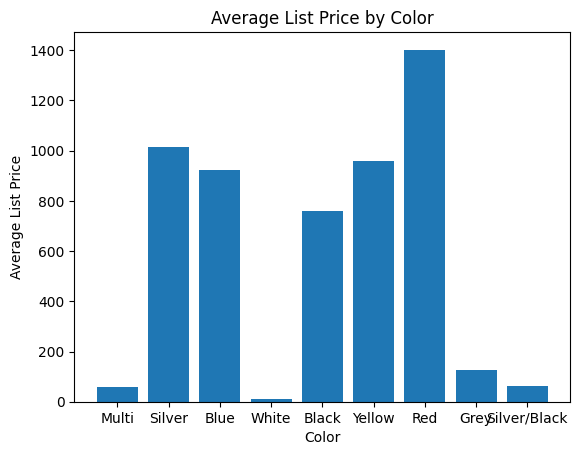

In [0]:
df1 = df.select(df.Name,df.ProductNumber, df.Color,df.Size,df.ListPrice.cast("float"))
df2= df1.groupBy(df.Color).agg({"ListPrice":"average"}).collect()
x=[]
y =[]
for i in df2:
  if i["Color"]!= "NULL":
    x.append(i["Color"])
    y.append(i["avg(ListPrice)"])
    
plt.bar(x, y)
plt.title('Average List Price by Color')
plt.xlabel('Color')
plt.ylabel('Average List Price')
plt.show()

## 5. Visualize Total Count per Size. Discuss/Explain your results.

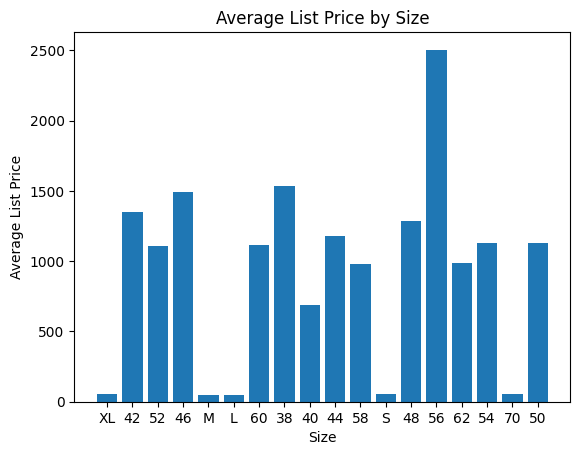

In [0]:
df2= df1.groupBy(df.Size).agg({"ListPrice":"average"}).collect()
x=[]
y =[]
for i in df2:
  if i["Size"]!= "NULL":
    x.append(i["Size"])
    y.append(i["avg(ListPrice)"])
    
plt.bar(x, y)
plt.title('Average List Price by Size')
plt.xlabel('Size')
plt.ylabel('Average List Price')
plt.show()

The first graph shows Average List by Colour where we can see that Avg price of Red is 1.4 higher than  any other colored object which is surprising because color shouldn't affect price that heavily on a like-to-like product basis.

The second graph shows Average List by Size where we can see that Avg Price of Size 56 is highest than all. This seems very suprising as the size genrally have trend from lower the size, lower the price to bigger the size and bigger the price. The company took an advanatage of ususal compatible size of 56 and increased their prices whereas when it comes to size 70, the market for that is low so they kept their prices low. Also specific sizes have larger prices than generic which with evidence shows the higher price that customers have to pay for customizability,

# Using Machine Learning Library (For Practice)

In [0]:
dfall = df.select(df.Weight.cast("float"), df.Size.cast("float"), df.ListPrice.cast("float"))
dfall.show(5, truncate=False)

+-------+----+---------+
|Weight |Size|ListPrice|
+-------+----+---------+
|1016.04|58.0|1431.5   |
|1016.04|58.0|1431.5   |
|NULL   |NULL|34.99    |
|NULL   |NULL|34.99    |
|NULL   |NULL|9.5      |
+-------+----+---------+
only showing top 5 rows



In [0]:
dfall = dfall.na.drop("any")

In [0]:
feature_columns = dfall.columns[:-1] # here we omit the final column for prediction
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")

In [0]:
data_2 = assembler.transform(dfall)

In [0]:
data_2.show()

+-------+----+---------+--------------------+
| Weight|Size|ListPrice|            features|
+-------+----+---------+--------------------+
|1016.04|58.0|   1431.5|[1016.03997802734...|
|1016.04|58.0|   1431.5|[1016.03997802734...|
|1043.26|62.0|   1431.5|[1043.26000976562...|
| 961.61|44.0|   1431.5|[961.609985351562...|
| 979.75|48.0|   1431.5|       [979.75,48.0]|
|  997.9|52.0|   1431.5|[997.900024414062...|
|1016.04|56.0|   1431.5|[1016.03997802734...|
|1115.83|58.0|   337.22|[1115.82995605468...|
| 1124.9|60.0|   337.22|[1124.90002441406...|
|1133.98|62.0|   337.22|[1133.97998046875...|
|1052.33|44.0|   337.22|[1052.32995605468...|
|1070.47|48.0|   337.22|[1070.46997070312...|
|1088.62|52.0|   337.22|[1088.61999511718...|
|1115.83|58.0|   337.22|[1115.82995605468...|
| 1124.9|60.0|   337.22|[1124.90002441406...|
|1133.98|62.0|   337.22|[1133.97998046875...|
|1006.97|44.0|   594.83|[1006.96997070312...|
|1025.11|48.0|   594.83|[1025.10998535156...|
|1043.26|52.0|   594.83|[1043.2600

In [0]:
from pyspark.ml.regression import LinearRegression

In [0]:
algo = LinearRegression(featuresCol="features", labelCol="ListPrice")

In [0]:
model = algo.fit(data_2)

In [0]:
evaluation_summary = model.evaluate(data_2)

In [0]:
evaluation_summary.rootMeanSquaredError

862.8415344138203

In [0]:
evaluation_summary.r2

0.10019389704278814